In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [112]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    n = data.shape[0]
    num_features = data.shape[1]
    clusters = np.zeros((k, num_features));
    
    #initialized three points as center of clustes
    for i in range(0, k):
        idx = n/k*i
        #print(idx)
        clusters[i,:] = data[idx]
        #clusters[i,:] = data[i]

    print("CLUSTERS:", np.shape(clusters), clusters)
    return clusters

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [113]:
from scipy.spatial import distance

#original build_distance_matrix in helpers.py
def build_distance_matrix_2(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    
    distances = np.zeros((len(data), len(mu)))
    for n in range(0, len(data)): #for all points
        for k in range(0, len(mu)): #for all clusters
            distances[n][k] = scipy.spatial.distance.euclidean(data[n], mu[k])

    return distances

#### Update k-means parameters

In [130]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    num_shapes   = data.shape[0]
    num_features = data.shape[1]
    num_clusters = len(mu_old)

    distances = build_distance_matrix(data, mu_old)
    losses = np.zeros((num_shapes,1))
    assignments = np.zeros((num_shapes,1))
    mu = np.zeros((num_clusters, num_features))
    for n in range(0, num_shapes):
        idx_mu = np.ndarray.argmin(distances[n])
        assignments[n] = idx_mu
        losses[n] = distances[n][idx_mu]

    #print("ASSIGNMENTS", np.shape(assignments))#, assignments)
    
    for k in range(0, num_clusters):
        idxs = np.where(assignments == k)[0]
        #print("IDXS", np.shape(idxs))
        assigned_data = [ data[x] for x in idxs]
        #print("ASSIGNED DATA", np.shape(assigned_data))
        mu[k,:] = np.mean(assigned_data, axis=0)


    return losses, assignments, mu

#### Play with k-means

0.0
136.0
CLUSTERS: (2, 2) [[  3.6  79. ]
 [  1.8  54. ]]
The current iteration of k-means is: 0,                the average loss is 4.77536328748152.
COLORS (3,)
MU (2, 2)
COLORS (3,)
MU (2, 2)


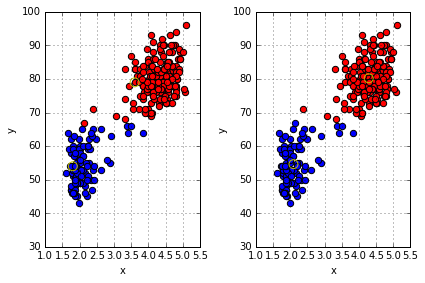

The current iteration of k-means is: 1,                the average loss is 4.679205084305819.
COLORS (3,)
MU (2, 2)
COLORS (3,)
MU (2, 2)


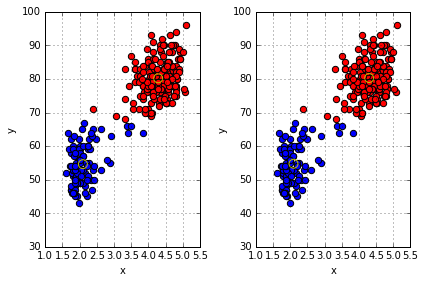

The current iteration of k-means is: 2,                the average loss is 4.68244411160236.
COLORS (3,)
MU (2, 2)
COLORS (3,)
MU (2, 2)


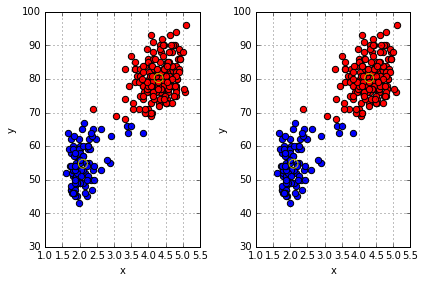

The current iteration of k-means is: 3,                the average loss is 4.68244411160236.


In [131]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [132]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [133]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = np.zeros((original_image.shape[0]*original_image.shape[1], original_image.shape[2]))
    print("ORIGINAL__IMAGE", np.shape(original_image))
    print("PROCESSED_IMAGE", np.shape(processed_image))
    
    for  i in range(original_image.shape[0]):
        for  j in range(original_image.shape[1]):
            idx = i*original_image.shape[0]+j
            processed_image[idx,:] = original_image[i][j]
            
    return processed_image

processed_image = preprocess_image(original_image)

ORIGINAL__IMAGE (480, 480, 3)
PROCESSED_IMAGE (230400, 3)


In [135]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    
    #k-clusters: group pixels with similar colors
    kmeans(processed_image, k, max_iters, threshold)

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 10
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

0.0
46080.0
92160.0
138240.0
184320.0
CLUSTERS: (5, 3) [[ 157.  146.   70.]
 [  64.   52.   26.]
 [  73.   47.   12.]
 [ 113.  109.   56.]
 [ 143.  130.   61.]]


KeyboardInterrupt: 